# Проект. Исследование финансирования стартапов

## Введение

## Шаг 1. Знакомство с данными: загрузка и предобработка

Датасет получен из базы данных стартапов.

Название основного датасета — `cb_investments.zip`. Внутри архива один файл — `cb_investments.csv`.

Описание данных:
* `name` — название компании.
* `homepage_url` — ссылка на сайт компании.
* `category_list` — категории, в которых работает компания. Указываются через `|`.
* `market` — основной рынок или отрасль компании.
* `funding_total_usd` — общий объём привлечённых инвестиций в долларах США.
* `status` — текущий статус компании, например `operating`, `closed` и так далее.
* `country_code` — код страны, например USA.
* `state_code` — код штата или региона, например, CA.
* `region` — регион, например, SF Bay Area.
* `city` — город, в котором расположена компания.
* `funding_rounds` — общее число раундов финансирования.
* `participants` — число участников в раундах финансирования.
* `founded_at` — дата основания компании.
* `founded_month` — месяц основания в формате `YYYY-MM`.
* `founded_quarter` — квартал основания в формате `YYYY-QN`.
* `founded_year` — год основания.
* `first_funding_at` — дата первого финансирования.
* `mid_funding_at` — дата среднего по времени раунда финансирования.
* `last_funding_at` — дата последнего финансирования.
* `seed` — сумма инвестиций на посевной стадии.
* `venture` — сумма венчурных инвестиций.
* `equity_crowdfunding` — сумма, привлечённая через долевой краудфандинг.
* `undisclosed` — сумма финансирования нераскрытого типа.
* `convertible_note` — сумма инвестиций через конвертируемые займы.
* `debt_financing` — сумма долгового финансирования.
* `angel` — сумма инвестиций от бизнес-ангелов.
* `grant` — сумма полученных грантов.
* `private_equity` — сумма инвестиций в виде прямых (частных) вложений.
* `post_ipo_equity` — сумма финансирования после IPO.
* `post_ipo_debt` — сумма долгового финансирования после IPO.
* `secondary_market` — сумма сделок на вторичном рынке.
* `product_crowdfunding` — сумма, привлечённая через продуктовый краудфандинг.
* `round_A` — `round_H` — сумма инвестиций в соответствующем раунде.

Название дополнительного датасета — `cb_returns.csv`. Он содержит суммы возвратов по типам финансирования в миллионах долларов по годам.

Описание данных:
* `year` — год возврата средств.
* `seed` — сумма возвратов от посевных инвестиций.
* `venture` — сумма возвратов от венчурных инвестиций.
* `equity_crowdfunding` — сумма, возвращённая по долевому краудфандингу.
* `undisclosed` — сумма возвратов нераскрытого типа.
* `convertible_note` — сумма возвратов через конвертируемые займы.
* `debt_financing` — сумма возвратов от долгового финансирования.
* `angel` — сумма возвратов бизнес-ангелам.
* `grant` — сумма возвратов по грантам.
* `private_equity` — сумма возвратов прямых (частных) вложений.
* `post_ipo_equity` — сумма возвратов от IPO.
* `post_ipo_debt` — сумма возвратов от долгового IPO.
* `secondary_market` — сумма возвратов от сделок на вторичном рынке.
* `product_crowdfunding` — сумма возвратов по продуктовому краудфандингу.

**Проект является учебным, все базы данных являются собственностью разработчика курсов.**

### Цели и задачи проекта

**Цель:**  
Провести исследовательский анализ венчурных инвестиций в стартапы, чтобы выявить закономерности финансирования, динамику развития компаний и определить наиболее перспективные направления для инвестиций.

**Задачи:** 

– Провести предобработку данных

– Разделить компании по срокам существования и количеству раундов финансирования для выявления ключевых групп

– Классифицировать сегменты рынка на массовые, средние и нишевые

– Определить типичные и аномальные значения объёмов инвестиций

– Сравнить популярность и объёмы различных типов финансирования

– Проанализировать динамику раундов и объёмов инвестиций по годам

– Рассчитать долю возврата средств для разных типов инвестирования и оценить её устойчивость

– Сформулировать выводы и рекомендации по инвестиционным стратегиям, актуальные для исторического периода до 2015 года

### 1.1. Вывод общей информации




Поле для вашего введения: опишите контекст и цели проекта. Чтобы изменить содержимое ячейки, дважды нажмите на неё или нажмите «Ввод».



In [1]:
#Устанавливаем/обновляем необходимые библиотеки
!pip install -q --upgrade missingno

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import warnings
warnings.filterwarnings("ignore") 

In [ ]:
# Загружаем cb_investments 
#Проект учебный данные не раскрываются
try:
    df_investments = pd.read_csv("/Users/anastasia/Desktop/Модульный проект 2/cb_investments.zip", sep=';', low_memory=False)
    df_returns = pd.read_csv("/Users/anastasia/Desktop/Модульный проект 2/cb_returns.csv", sep=',', low_memory=False)
except FileNotFoundError:
    df_investments,df_returns  = pd.read_csv(, sep=';', low_memory=False) #Проект учебный данные не раскрываются

In [3]:
#Выводим первые 5 строк для ознакомления
print("cb_investments.zip:")
display(df_investments.head())
df_investments.info()
display(df_investments.shape)

cb_investments.zip:


,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,Harvard University,http://harvard.edu,|Education|,Education,"9,00,00,000",operating,USA,MA,Boston,Cambridge,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,University of New Brunswick,http://www.unb.ca,NaN,NaN,"20,00,000",operating,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,DuPont,http://www.dupont.com,|Business Services|Agriculture|Automotive|Inve...,Business Services,"90,00,000",operating,USA,DE,"Wilmington, Delaware",Wilmington,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,University of Michigan,http://www.umich.edu/,|Education|,Education,"77,00,000",operating,USA,MI,Detroit,Ann Arbor,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Case Western Reserve University,http://www.case.edu,|Education|,Education,"5,40,000",operating,USA,OH,Cleveland,Cleveland,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  49437 non-null  object 
 1   homepage_url          45989 non-null  object 
 2   category_list         45477 non-null  object 
 3    market               45477 non-null  object 
 4    funding_total_usd    49438 non-null  object 
 5   status                48124 non-null  object 
 6   country_code          44165 non-null  object 
 7   state_code            30161 non-null  object 
 8   region                44165 non-null  object 
 9   city                  43322 non-null  object 
 10  funding_rounds        49438 non-null  float64
 11  participants          30473 non-null  float64
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year       

(54294, 40)

In [4]:
print("\ncb_returns.zip:")
display(df_returns.head())
df_returns.info()
display(df_returns.shape)


cb_returns.zip:


,year,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding
0,2000,16.70,55.40,0.0,78.21,0.00,8.66,6.43,0.0,0.00,0.94,0.0,0.20,0.0
1,2001,2.88,23.49,0.0,21.50,0.01,4.49,1.18,0.0,0.00,0.46,0.0,0.46,0.0
2,2002,6.59,209.42,0.0,25.77,0.02,3.42,3.41,0.0,1.51,0.34,0.0,0.06,0.0
3,2003,7.74,233.86,0.0,9.40,0.01,1.09,3.41,0.0,1.62,2.11,0.0,0.08,0.0
4,2004,9.93,555.90,0.0,33.19,0.01,13.55,9.18,0.0,2.19,3.38,0.0,0.55,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  15 non-null     int64  
 1   seed                  15 non-null     float64
 2   venture               15 non-null     float64
 3   equity_crowdfunding   15 non-null     float64
 4   undisclosed           15 non-null     float64
 5   convertible_note      15 non-null     float64
 6   debt_financing        15 non-null     float64
 7   angel                 15 non-null     float64
 8   grant                 15 non-null     float64
 9   private_equity        15 non-null     float64
 10  post_ipo_equity       15 non-null     float64
 11  post_ipo_debt         15 non-null     float64
 12  secondary_market      15 non-null     float64
 13  product_crowdfunding  15 non-null     float64
dtypes: float64(13), int64(1)
memory usage: 1.8 KB


(15, 14)

**Структура данных**

В датасете `cb_investments` 54 294 записи и 40 столбцов. Набор данных содержит информацию о компаниях, раундах инвестиций и типах инвестиций. В датасете `cb_returns` 15 записей и 14 столбцов. Набор данных содержит информацию о доходности от инвестиций по годам. Названия столбцов и их назначение соответствуют описанию проекта.

**Пропущенные значения**

В датасете `cb_investments`есть большое кол-во пропусков в важных полях: name (8 857), homepage_url (8 305), category_list и market (≈ 817), country_code (10 129), state_code (24 133), region (10 129), city (10 972), participants (≈3 821). Также пропуски в даты основания.

В датасете `cb_returns` данные полные.

Необходимо понять причины пропусков в первом датасете и провести работу с ними (стратегия заполнения или удаления), чтобы они не искажали результаты анализа.

**Типы данных**

В `cb_investments` необходимо изменить формат данных в некоторых столбцах:
1) funding_total_usd изменить тип на float
2) Даты в столбцах founded_at, first_funding_at, mid_funding_at, last_funding_at тип object конвертировать в  datetime
В cb_returns все типы данных корректные

**Особенности и моменты для предобработки**

1) Необходимо поработать с форматом чисел в funding_total_usd и некоторых суммах использованы запятые как разделители тысяч. Их нужно очистить перед конвертацией в float.

2) Также унифицировать написание категорий в category_list

3)Некоторые суммы инвестиций могут содержать экстремальные значения, потребуются фильтры и ограничение периода анализа.

### 1.2. Предобработка данных


При проверки названия столбцов датасетов, можно сдлеать вывод, что названия отражают смысл, но встречаются лишние пробелы перед названиями. Необходимо провести нормализацию названий столбцов.

In [5]:
#Приводим названия столбцов df_investmentd  к единому стилю и удаляем лишние пробелы
df_investments.columns = df_investments.columns.str.strip().str.lower().str.replace(' ', '_')
#Проверим
print(df_investments.columns)

Index(['name', 'homepage_url', 'category_list', 'market', 'funding_total_usd',
       'status', 'country_code', 'state_code', 'region', 'city',
       'funding_rounds', 'participants', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at', 'mid_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_a', 'round_b',
       'round_c', 'round_d', 'round_e', 'round_f', 'round_g', 'round_h'],
      dtype='object')


Нормализуем данные в столбце `funding_total_usd` (уберем выделение разрядов и приведем к числовому типу):

In [6]:
#Убираем разделители тысяч (запятые)
df_investments['funding_total_usd'] = (df_investments['funding_total_usd'].astype(str).str.replace(',', '', regex=False))

#Преобразуем значения в числовой тип
df_investments['funding_total_usd'] = pd.to_numeric(df_investments['funding_total_usd'], errors='coerce')

#Проверка
print(df_investments['funding_total_usd'].head())
print(df_investments['funding_total_usd'].dtype)

0    90000000.0
1     2000000.0
2     9000000.0
3     7700000.0
4      540000.0
Name: funding_total_usd, dtype: float64
float64


Для корректной работы с датами преобразуем все столбцы, где они хранятся как строки (object).

А именно: founded_at, first_funding_at, mid_funding_at, last_funding_at

In [7]:
# Преобразуем строки в формат datetime
date_columns = ['founded_at', 'first_funding_at', 'mid_funding_at', 'last_funding_at']

for col in date_columns:
    df_investments[col] = pd.to_datetime(df_investments[col], errors='coerce')

# Проверяем результат
print(df_investments[date_columns].dtypes)


founded_at          datetime64[ns]
first_funding_at    datetime64[ns]
mid_funding_at      datetime64[ns]
last_funding_at     datetime64[ns]
dtype: object


В датасете `cb_returns` сделаем столбец `year` индексом всего датасета:

In [8]:
# Устанавливаем столбец year как индекс
df_returns.set_index('year', inplace=True)

#Проверяем
df_returns.head()
df_returns.index

Index([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014],
      dtype='int64', name='year')

Проанализируем пропуски в столбцах и определим стратегию работы с пропусками:

Количество строк в исходном датафрейме: 54294

Доля пропусков (%):
 name                     8.95
homepage_url            15.30
category_list           16.24
market                  16.24
funding_total_usd       24.66
status                  11.36
country_code            18.66
state_code              44.45
region                  18.66
city                    20.21
funding_rounds           8.94
participants            43.87
founded_at              28.99
founded_month           29.12
founded_quarter         29.12
founded_year            28.99
first_funding_at         8.96
mid_funding_at          44.21
last_funding_at          8.95
seed                     8.94
venture                  8.94
equity_crowdfunding      8.94
undisclosed              8.94
convertible_note         8.94
debt_financing           8.94
angel                    8.94
grant                    8.94
private_equity           8.94
post_ipo_equity          8.94
post_ipo_debt            8.94
secondary_market         8.94
pr

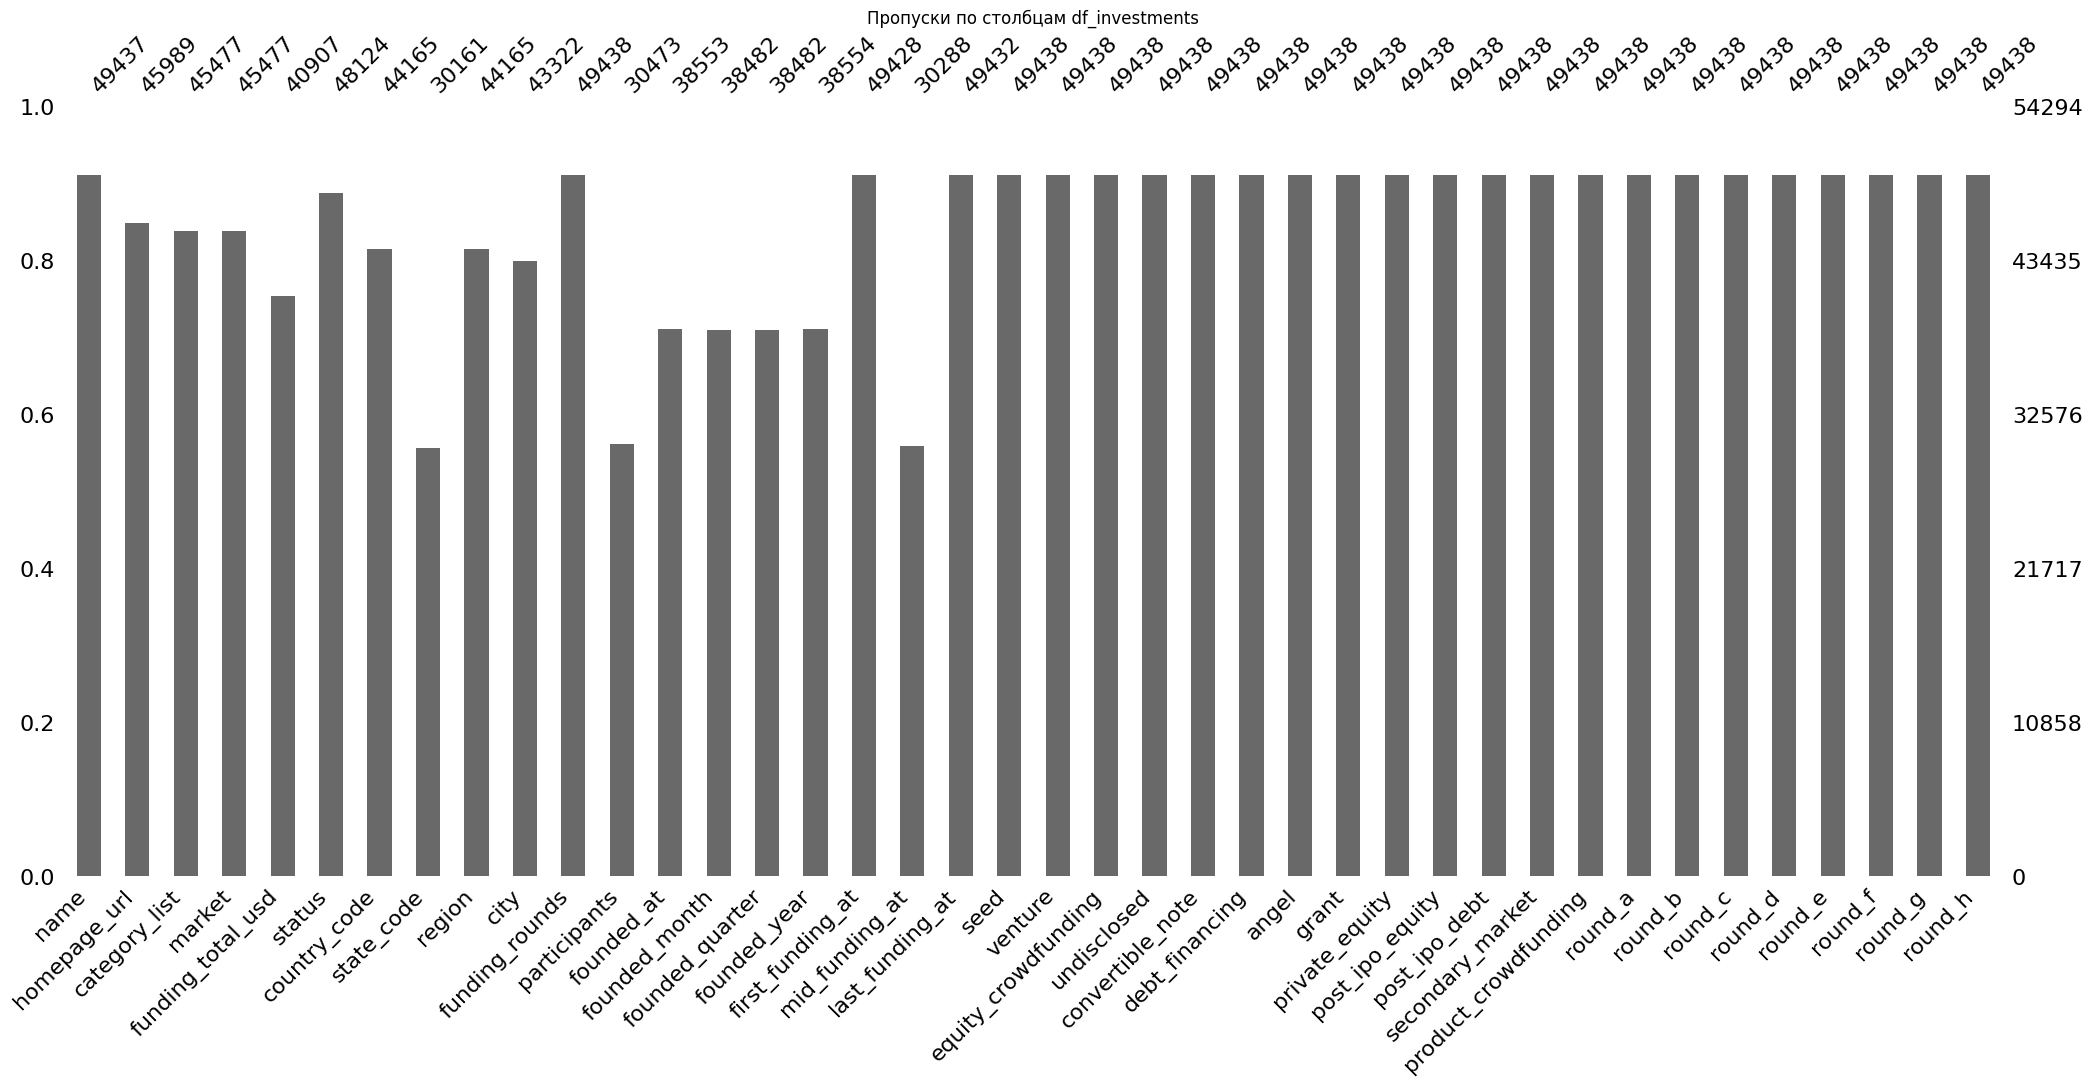

In [9]:
#Подсчитаем общее количество строк перед работой с пропусками
initial_rows = df_investments.shape[0]
print("Количество строк в исходном датафрейме:", initial_rows)

#Подсчёт доли пропусков
missing_share = (df_investments.isna().mean() * 100).round(2)

print("\nДоля пропусков (%):\n", missing_share)

#Визуализируем пропуски с помощью msno
plt.figure(figsize=(10,5))
msno.bar(df_investments)
plt.title('Пропуски по столбцам df_investments')
plt.show()

Наибольшие доли пропусков наблюдаются в следующих столбцах:

- state_code 44,45 %

- mid_funding_at 44,21 %

- participants 43,87 %

- founded____ (все столбцы с датой основания) — 29 %
- funding_total_usd 24,66 %

В столбцах, связанных с адресом компании: country_code, region, city от 18 % до 20 %.
В столбцах с названием и категорией: name, status, category_list, market, homepage_url  от 9 % до 16 %.

**Предположение о происхождении пропусков:**
Можно сделать предположение, что пропуски появились из-за неполноты исходных источников данных, отсутствия открытой информации. В случае с финансовыми данными (funding_total_usd) пропуски могли появиться, если компания не раскрыла свои инвестиции или раунд ещё не был завершён, тут необходимо уточнение у владельца информации.

**У разных групп столбцов подходы к работе с пропусками будут разные:**

1)Столбцы seed, venture, equity_crowdfunding, undisclosed, convertible_note, debt_financing, angel, grant, private_equity, post_ipo_equity, post_ipo_debt, secondary_market, product_crowdfunding и round_a - round_h связаны со столбцом **funding_rounds**.
Это указывает на то, что отсутствие данных по одному типу инвестиций означает отсутствие информации в целом.
Так как данные о видах инвестиций формируют единый логический блок нужно его рассматривать в целом и можно удалить строки, в которых все значения этого набора пусты. Мы потеряем около 9% данных.

In [10]:
# Удаляем строки, где все столбцы с раундами инвестиций пусты
funding_cols = ['seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note',
                'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
                'post_ipo_debt', 'secondary_market', 'product_crowdfunding',
                'round_a', 'round_b', 'round_c', 'round_d', 'round_e', 'round_f', 'round_g', 'round_h']

initial_rows = len(df_investments)

df_investments = df_investments.dropna(subset=funding_cols, how='all')


removed_rows = initial_rows - len(df_investments)
print(f"Удалено строк: {removed_rows}")
print(f"Осталось строк: {len(df_investments)}")

Удалено строк: 4856
Осталось строк: 49438


2)В строках founded_at, founded_year, founded_month, founded_quarter 29% пропусков, однако если мы используем индикатор Unknown это сделает тип данных  оbject в столбце и создаст препятствия для дальнейшего анализа, оставляем как есть.

3)Столбец participants содержит почти 44% пропусков.
Стратегия: заполнить пропуски значением-индикатором -1, чтобы отличать их от реально указанных нулевых значений.

In [11]:
#Заполняем пропуски в столбце participants значением-индикатором -1
df_investments['participants'] = df_investments['participants'].fillna(-1)

4)Столбцы country_code, region, city и state_code содержат пропуски от 18% до 44%.
Стратегия: чтобы упростить дальнейший анализ и не терять строки, все пропуски в этих столбцах заменяем на метку "Unknown"

In [12]:
location_columns = ['country_code', 'region', 'city', 'state_code']

#Заполняем пропуски меткой "Unknown"
df_investments[location_columns] = df_investments[location_columns].fillna('Unknown')


5)Столбцы category_list и market содержат около 16% пропусков.
Стратегия: заполнить их меткой "Unknown", чтобы сохранить все строки

In [13]:
#Заполняем пропуски в категориальных столбцах 'category_list' и 'market' меткой "Unknown"
df_investments['category_list'] = df_investments['category_list'].fillna('Unknown')
df_investments['market'] = df_investments['market'].fillna('Unknown')

In [14]:
#Считаем кол-во удаленных строк
df_len = df_investments.shape[0]

# Количество удалённых строк
removed_rows = initial_rows - df_len

# Доля удалённых строк в процентах
removed_share = (removed_rows / initial_rows) * 100

# Вывод
print(f"Удалено строк: {removed_rows} ({removed_share:.2f}%)")

Удалено строк: 4856 (8.94%)


Обработаем полные дубликаты в данных и пропуски в `funding_total_usd`. избавимся от тех строк, которые не несут какой-либо информации либо не содержат данных о финансировании:

In [15]:
#Считаем количество строк до удаления дубликатов
rows_before_duplicates = df_investments.shape[0]

# Удаляем полные дубликаты
df_investments = df_investments.drop_duplicates()

# Количество удалённых дубликатов
removed_duplicates = rows_before_duplicates - df_investments.shape[0]
print(f"Кол-во удаленных дубликатов: {removed_duplicates}")

Кол-во удаленных дубликатов: 0


In [ ]:
# Считаем количество строк до удаления
rows_before_deleted = df_investments.shape[0]

# Удаляем строки, где funding_total_usd пустой или равен 0
df_investments = df_investments[df_investments['funding_total_usd'].notna() & 
                                (df_investments['funding_total_usd'] != 0)]

# Считаем удалённые строки и долю
removed_rows = rows_before_deleted  - df_investments.shape[0]
removed_share = (removed_rows / rows_before_deleted ) * 100

print(f"Удалено строк без информации о финансировании: {removed_rows} ({removed_share:.2f}%)")
print(f"Осталось строк: {df_investments.shape[0]}")

Удалено строк без информации о финансировании: 8531 (17.26%)
Осталось строк: 40907


Заполним пропуски в `mid_funding_at` на основании значений в столбцах `first_funding_at` и `last_funding_at` – используем середину интервала между этими двумя датами.

In [17]:
#Заполняем mid_funding_at как середину между first и last, если оба значения есть
df_investments.loc[
    df_investments['mid_funding_at'].isna() &
    df_investments['first_funding_at'].notna() &
    df_investments['last_funding_at'].notna(),
    'mid_funding_at'
] = df_investments['first_funding_at'] + (
    (df_investments['last_funding_at'] - df_investments['first_funding_at']) / 2
)

# Считаем количество пропусков после заполнения
missing_after = df_investments['mid_funding_at'].isna().sum()
print(f"Пропусков после: {missing_after}")

Пропусков после: 1


После заполнения столбца mid_funding_at пропусков осталось 1 - ничтожно мало, это не повлияет на анализ.

В столбце category_list находятся списки категорий через |, для удобства проведения дальнейщего анализа проведем нормализацию данных в столбце:

In [18]:
#Создаем функцию для нормализации данных в category_list 
def normalize_categories(x):
    #Если строка пустая, ставим индикатор
    if pd.isna(x) or x == '':
        return ['unknown']
    #Если тип данных list, нормализуем каждый элемент
    if isinstance(x, list):
        return [cat.strip().lower() for cat in x]
    #Если это строка, разделяем по запятой и нормализуем
    return [cat.strip().lower() for cat in x.split(',')]
# Применяем функцию к столбцу category_list
df_investments['category_list'] = df_investments['category_list'].apply(normalize_categories)

Проанализируем датасет на пропуски после их обработки:

Количество строк после предобработки: 40907
Удалено строк: 13387 (24.66%)

Доля пропусков (%):
 name                     0.00
homepage_url             5.66
category_list            0.00
market                   0.00
funding_total_usd        0.00
status                   2.70
country_code             0.00
state_code               0.00
region                   0.00
city                     0.00
funding_rounds           0.00
participants             0.00
founded_at              21.28
founded_month           21.44
founded_quarter         21.44
founded_year            21.28
first_funding_at         0.00
mid_funding_at           0.00
last_funding_at          0.00
seed                     0.00
venture                  0.00
equity_crowdfunding      0.00
undisclosed              0.00
convertible_note         0.00
debt_financing           0.00
angel                    0.00
grant                    0.00
private_equity           0.00
post_ipo_equity          0.00
post_ipo_debt            0.00
seco

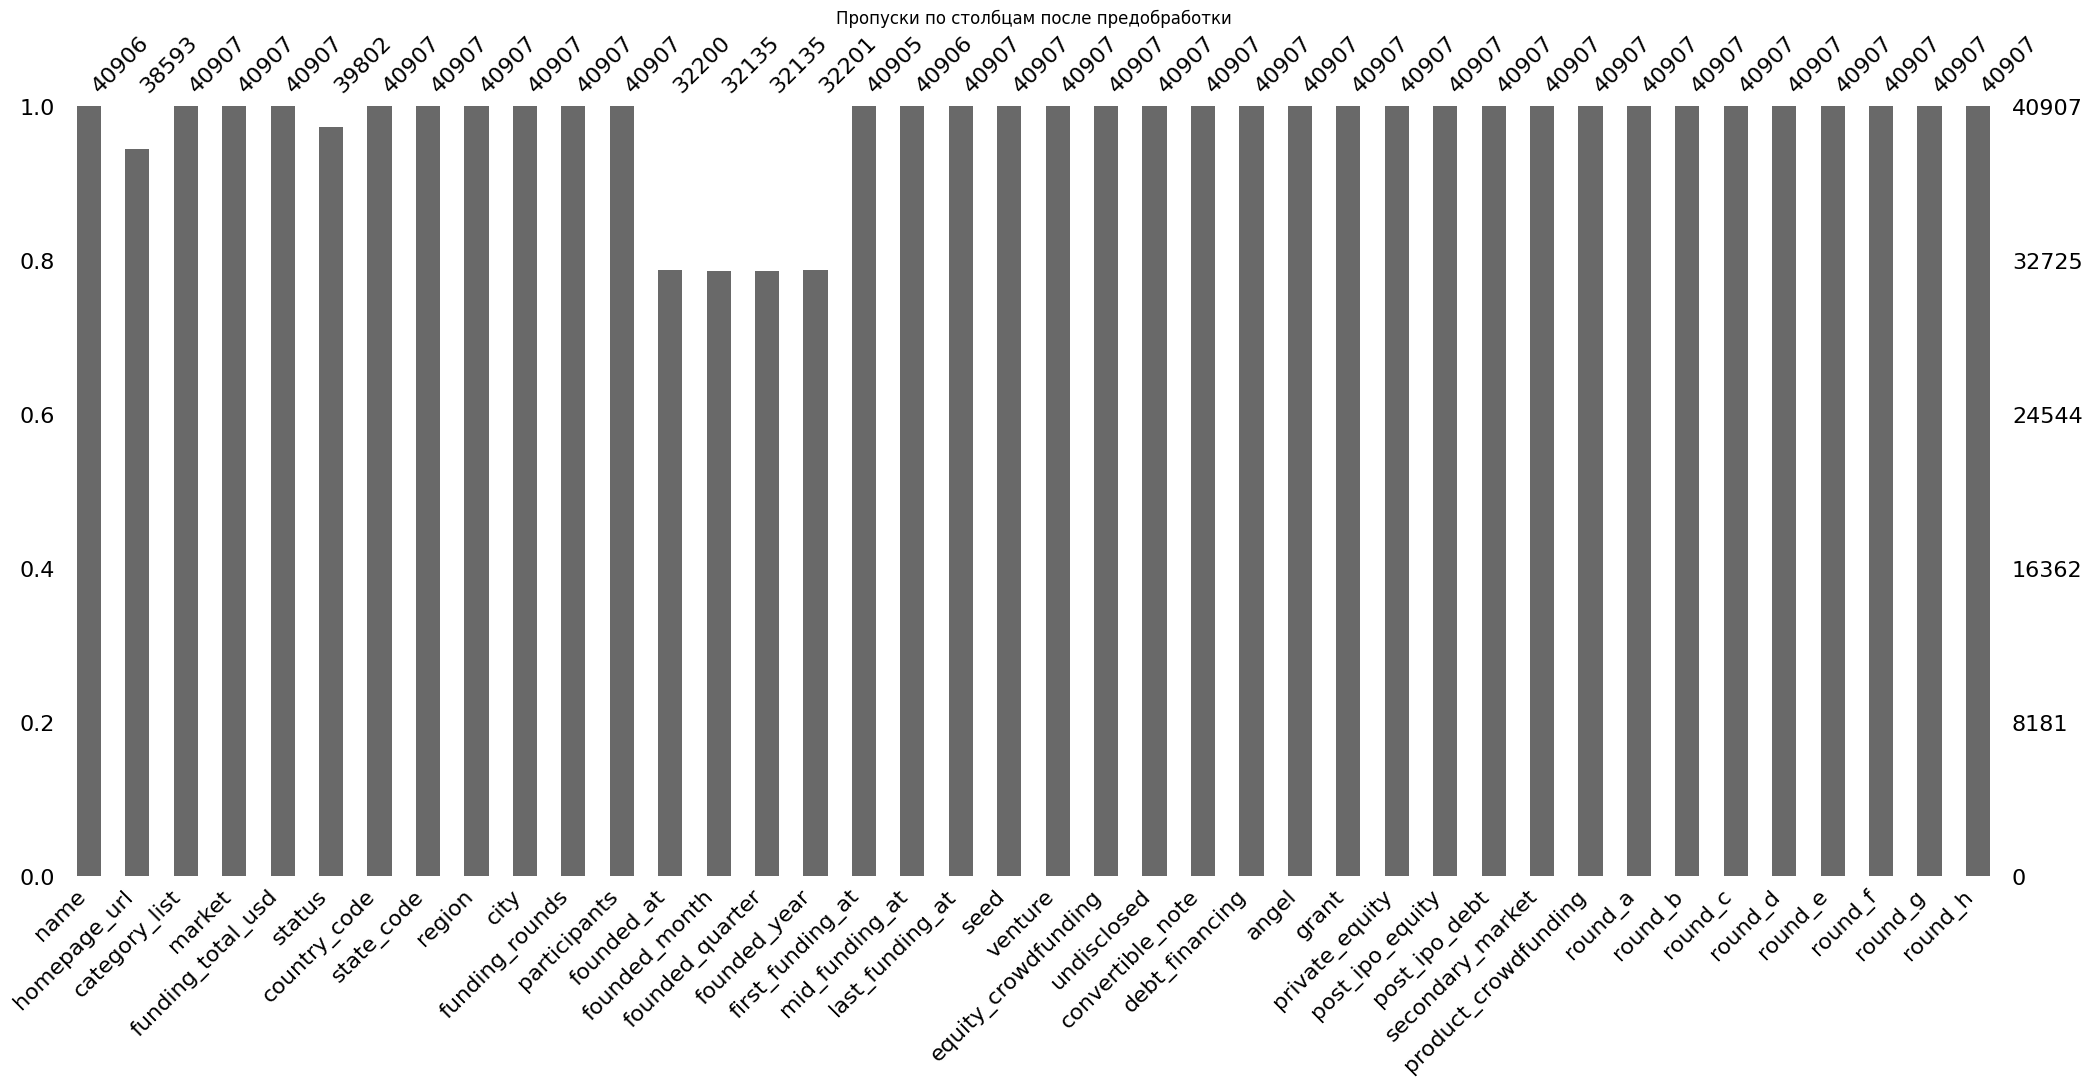

In [19]:
#Количество строк до предобработки
initial_rows = 54294

#Количество строк после предобработки
final_rows = df_investments.shape[0]
print("Количество строк после предобработки:", final_rows)

#Доля удалённых строк
removed_rows = initial_rows - final_rows
removed_share = round((removed_rows / initial_rows) * 100, 2) 
print(f"Удалено строк: {removed_rows} ({removed_share}%)")

#Считаем долю пропусков
missing_share = (df_investments.isna().sum() / len(df_investments) * 100).round(2)
print("\nДоля пропусков (%):\n", missing_share)

#Визуализируем пропуски
plt.figure(figsize=(10,5))
msno.bar(df_investments)
plt.title('Пропуски по столбцам после предобработки')
plt.show()


**Промежуточные выводы по предварительной обработке данных:**

Количество строк после предобработки: 40 907 Удалено строк: 13387 (24.66% от исходного датасета)

1) Все финансовые данные обработаны полностью — funding_total_usd и все типы инвестиций (seed, venture и т.д.) теперь без пропусков.

2) Столбцы категории и рынок (category_list и market) полностью заполнены.

3) Вся информация по адресам (country_code, state_code, region, city) без пропусков благодаря индикатору Unknown.

4) Все участники раундов заполнены индикатором -1.

5) Пропуски остались только в датах основания компаний (в связи с тем чтобы не менять тип данных в столбцах)

**Проверим пропуски в датафрейме cb_returns:**

In [20]:
# Проверка на пропуски во втором датафрейме
initial_rows_returns = df_returns.shape[0]
print("Количество строк в cb_returns:", initial_rows_returns)

# Доля пропусков по столбцам
missing_share_returns = (df_returns.isna().sum() / len(df_returns) * 100).round(2)
print("\nДоля пропусков (%):\n", missing_share_returns)


Количество строк в cb_returns: 15

Доля пропусков (%):
 seed                    0.0
venture                 0.0
equity_crowdfunding     0.0
undisclosed             0.0
convertible_note        0.0
debt_financing          0.0
angel                   0.0
grant                   0.0
private_equity          0.0
post_ipo_equity         0.0
post_ipo_debt           0.0
secondary_market        0.0
product_crowdfunding    0.0
dtype: float64


**Промежуточный вывод:** 
В датафрейме cb_returns нет пропусков 

## Шаг 2. Инжиниринг признаков

### 2.1. Группы по срокам финансирования

Разделим все компании на три группы:

* Единичное финансирование — был всего один раунд финансирования.

* Срок финансирования до года — между первым и последним раундом финансирования прошло не более года.

* Срок финансирования более года.

Визуализируем соотношение этих групп, создав два графика:

* По количеству компаний: (какой процент от общего числа компаний относится к каждой из трёх групп)
* По объёму инвестиций: (какая доля от общего объёма привлечённых средств получила каждая группа)


Доля компаний по группам финансирования (%):
 funding_group
Единичное финансирование    58.95
Более года                  30.05
До года                     11.00
Name: proportion, dtype: float64

Доля инвестиций по группам финансирования (%):
 funding_group
Более года                  61.87
До года                      7.51
Единичное финансирование    30.62
Name: funding_total_usd, dtype: float64


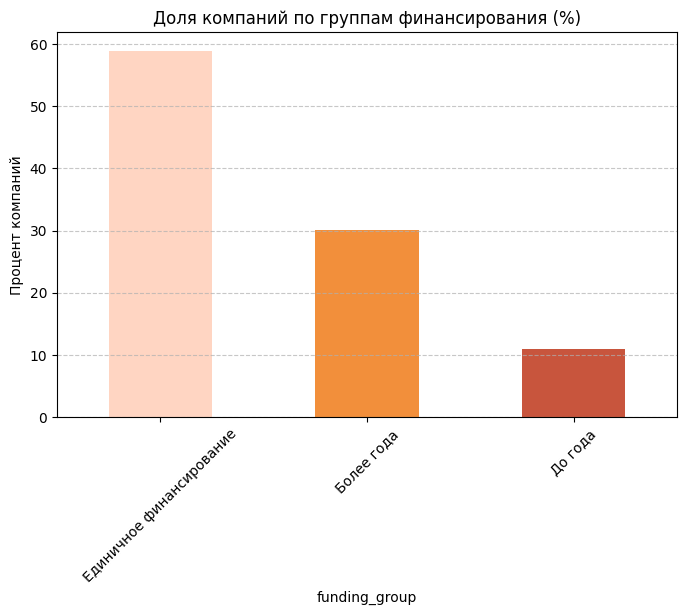

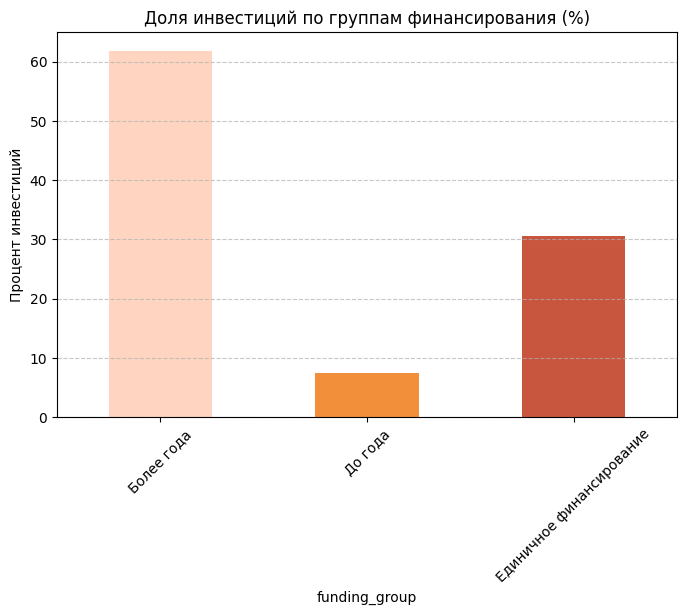

In [24]:
#Рассчитаем длительность финансирования в годах
df_investments['funding_duration_years'] = ((df_investments['last_funding_at'] - df_investments['first_funding_at']).dt.days / 365)

#Создаём столбец с группами финансирования
def funding_group(row):
    if row['funding_rounds'] == 1:
        return 'Единичное финансирование'
    elif row['funding_duration_years'] <= 1:
        return 'До года'
    else:
        return 'Более года'
df_investments['funding_group'] = df_investments.apply(funding_group, axis=1)

#Считаем количество компаний в каждой группе и долю от общего
group_share = (df_investments['funding_group'].value_counts(normalize=True) * 100).round(2)
print("Доля компаний по группам финансирования (%):\n", group_share)

#Считаем доли инвестиций по группам 
investment_share = (df_investments.groupby('funding_group')['funding_total_usd'].sum()/ df_investments['funding_total_usd'].sum() * 100).round(2)
print("\nДоля инвестиций по группам финансирования (%):\n", investment_share)

#Визуализируем количество компаний по группам финансирования
plt.figure(figsize=(8, 5))
group_share.plot(kind='bar', color=['#FFD5C2', '#F28F3B', '#C8553D'])
plt.title('Доля компаний по группам финансирования (%)')
plt.ylabel('Процент компаний')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#Визуализируем распределение инвестиций по группам финансирования
plt.figure(figsize=(8, 5))
investment_share.plot(kind='bar', color=['#FFD5C2', '#F28F3B', '#C8553D'])
plt.title('Доля инвестиций по группам финансирования (%)')
plt.ylabel('Процент инвестиций')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Промежуточные выводы по группам финансирования:**

- 58,95% компаний получили единичное финансирование

- около 30% компаний финансировались длительно (несколько раундов, более года)

- только 11% компаний привлекли несколько раундов в течение года

По объёму инвестиций:

- 61,87% всего объёма инвестиций направлено на компании с длительным финансированием

- 30,62% инвестиций были вложены в единичное финансирование

- только 7,51% от всех средств вложены в финансирование до года.

1)Большинство стартапов получают только один раунд инвестиций, а долгосрочное финансирование встречается реже.
2)Долгосрочно финансируемые компании привлекают большую часть инвестиций, даже если их меньше.


### 2.2 Выделение средних и нишевых сегментов рынка

Рассчитакм, как часто в датасете встречается каждый из сегментов в столбце `market`. 
Сегменты, к которым относится более 120 компаний, отнесем к массовым, сегменты, в которые входит от 35 до 120 включительно, отнесем к средним, а сегменты до 35 компаний отнесем к нишевым:

Количество сегментов по категориям:
massive     54
mid         81
niche      714
dtype: int64
market_segment
niche       2494
mid         5069
massive    33344
Name: count, dtype: int64


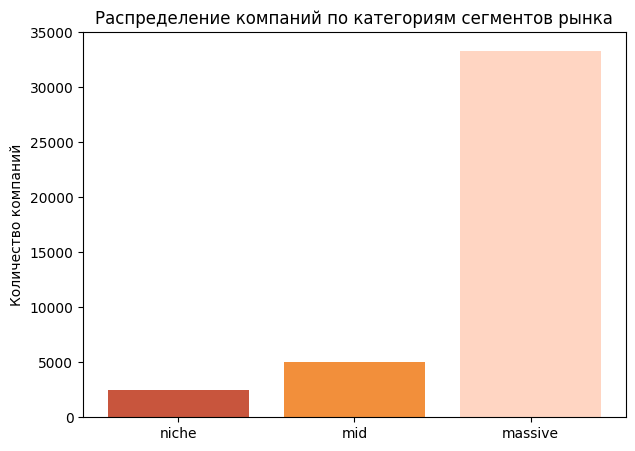

In [25]:
#Считаем кол-во компаний в каждом сегменте рынка
market_counts = df_investments['market'].value_counts().reset_index()
market_counts.columns = ['market', 'count']

#Классифицируем сегменты по размеру
massive_markets = market_counts[market_counts['count'] > 120]['market']
mid_markets     = market_counts[(market_counts['count'] >= 35) & (market_counts['count'] <= 120)]['market']
niche_markets   = market_counts[market_counts['count'] < 35]['market']

#Считаем сколько сегментов попадает в каждую категорию
segment_distribution = pd.Series({
    'massive': len(massive_markets),
    'mid': len(mid_markets),
    'niche': len(niche_markets)
})
print("Количество сегментов по категориям:")
print(segment_distribution)

#Создаём новую колонку с типом сегмента
def categorize_market(market):
    if market in massive_markets.values:
        return 'massive'
    elif market in mid_markets.values:
        return 'mid'
    else:
        return 'niche'
df_investments['market_segment'] = df_investments['market'].apply(categorize_market)

#Считаем сколько компаний в каждой категории сегмента
company_distribution = df_investments['market_segment'].value_counts().reindex(['niche','mid','massive'])
print(company_distribution)

#Визуализируем распределение компаний по сегментам с помощью столбчатой диаграммы
plt.figure(figsize=(7,5))
colors = ['#C8553D', '#F28F3B', '#FFD5C2']  # цвета для niche, mid, massive
plt.bar(company_distribution.index, company_distribution.values, color=colors)
plt.xticks(rotation=0)
plt.ylabel('Количество компаний')
plt.title('Распределение компаний по категориям сегментов рынка')
plt.show()

Оставим в столбце `market` только массовые сегменты. Для остальных сегментов заменим значения на заглушки — `niche` для нишевых и `mid` для средних.

In [27]:
#Обновляем столбец market, оставляем только массовые сегменты, для остальных ставим 'mid' или 'niche'
def rename_market(market_name):
    if market_name in massive_markets.values:
        return market_name
    elif market_name in mid_markets.values:
        return 'mid'
    else:                           
        return 'niche'

df_investments['market'] = df_investments['market'].apply(rename_market)

**Промежуточный вывод по сегментам рынка:**

Сегменты рынка классифицированы на массовые (massive), средние (mid) и нишевые (niche) по количеству компаний:
- Массовые сегменты: 54
- Средние сегменты: 81
- Нишевые сегменты: 714

Распределение компаний по категориям сегментов показывает, что большинство компаний сосредоточено в массовых сегментах:
- Массовые сегменты — 33 344 компаний (81%)
- Средние сегменты — 5 069 компаний (12%)
- Нишевые сегменты — 2 494 компаний (6%)

Для дальнейшего анализа в столбце market оставили только сегменты, которые относятся к massive. Для остальных сегментов установлены метки 'mid' и 'niche'.

## Шаг 3. Работа с выбросами и анализ

### 3.1. Анализируем и помечаем выбросы в каждом из сегментов

Проанализируем обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

По предобработанному столбцу `funding_total_usd` оценим, какой размер общего финансирования для одной компании будет типичным, а какие значения являются выбросами.

In [ ]:
#Посмотрим описательную статистику funding_total_usd
print("Описательная статистика по funding_total_usd:")
display(df_investments['funding_total_usd'].describe()) 

#Визуализируем распределение величины с помощью гистограммы
plt.figure(figsize=(8,5))
sns.histplot(df_investments['funding_total_usd'], bins=50,log_scale=True, color="#F28F3B") #Чтобы визуализировать лучше, используем логарифмическую шкалу по оси X
plt.title('Распределение общего объёма финансирования')
plt.xlabel('funding_total_usd')
plt.ylabel('Количество компаний')
plt.show()

#Визуализируем статистики столбца funding_total_usd с помощью ящика с усами
plt.figure(figsize=(8,2.5))
sns.boxplot(x=df_investments['funding_total_usd'], color="#C8553D")
plt.title('Boxplot: общий объём финансирования')
plt.xlabel('funding_total_usd')
plt.show()

**Промежуточный вывод:**

Из-за того что данные имеют сильный перекосов и большие выбросы, делаем вывод по описательной статистике распределения финансирования:

Медиана (50-й перцентиль) = 2000000 долл. США

Нижний квартиль (25%) = 350000 долл. США

Верхний квартиль (75%) = 10000000  долл. США

Среднее = 15912530  долл. США, 

Есть выбросы, которые сильно влияют на анализ - 30 млрд  долл. США.

Классический график ящик с усами здесь неинформативен, так как из-за огромного разброса значений весь график сжимается слева и не показывает распределение типичных значений. Можно попробовать использовать ящик с усами на логарифмическом масштабе:

Определим компании с аномальным объёмом общего финансирования, используя метод IQR отдельно по каждому сегменту.

Определим топ сегментов рынка с наибольшей долей компаний, получивших аномальное финансирование.

In [28]:
#Создаём столбец для того, чтобы отмечать, какие значения являются аномалиями
df_investments['is_outlier'] = False

#Все нишевые сегменты объединяем в одну группу, средние — в другую, массовые оставляем как есть
df_investments['segment_for_outlier'] = df_investments['market'].copy()
df_investments.loc[df_investments['market_segment'] == 'mid', 'segment_for_outlier'] = 'mid'
df_investments.loc[df_investments['market_segment'] == 'niche', 'segment_for_outlier'] = 'niche'

#Определяем выбросы для каждого сегмента
outlier_summary = []

#Создаем цикл, который определяет границы по IQR для каждого сегмента
for segment in df_investments['segment_for_outlier'].unique():
    segment_data = df_investments[df_investments['segment_for_outlier'] == segment]['funding_total_usd']
    Q1 = segment_data.quantile(0.25)
    Q3 = segment_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    #Отмечаем те значения, которые выходят за рамки границ и являются выбросами
    df_investments.loc[df_investments['segment_for_outlier'] == segment, 'is_outlier'] = (segment_data < lower_bound) | (segment_data > upper_bound)
    #Создаем результаты со границами и выбросами для каждого сегмента
    outlier_count = df_investments[(df_investments['segment_for_outlier'] == segment) & (df_investments['is_outlier'])].shape[0]
    outlier_share = outlier_count / segment_data.shape[0] * 100
    outlier_summary.append({
        'segment': segment,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'outlier_count': outlier_count,
        'outlier_share_%': outlier_share
    })

#Превращаем результаты в датафрейм и выбираем топ 10 по доле выбросов
outlier_df = pd.DataFrame(outlier_summary).sort_values(by='outlier_share_%', ascending=False)
display(outlier_df.head(10))  


,segment,Q1,Q3,IQR,lower_bound,upper_bound,outlier_count,outlier_share_%
29,Real Estate,200000.00,5500000.00,5300000.0,-7750000.00,13450000.00,45,17.928287
31,Technology,450000.00,25000000.00,24550000.0,-36375000.00,61825000.00,37,16.157205
43,Search,390160.75,6312488.75,5922328.0,-8493331.25,15195980.75,39,16.115702
38,Software,480000.00,12000000.00,11520000.0,-16800000.00,29280000.00,22,16.058394
47,Entertainment,100000.00,6800000.00,6700000.0,-9950000.00,16850000.00,22,16.058394
51,Cloud Computing,600000.00,10000000.00,9400000.0,-13500000.00,24100000.00,21,16.030534
50,Big Data,300000.00,7000000.00,6700000.0,-9750000.00,17050000.00,22,15.714286
48,SaaS,288082.75,4954320.25,4666237.5,-6711273.50,11953676.50,35,15.625000
36,E-Commerce,250000.00,4200000.00,3950000.0,-5675000.00,10125000.00,20,15.503876
27,Travel,154392.00,6100000.00,5945608.0,-8764020.00,15018412.00,45,15.358362


Анализ показал, что в большинстве сегментов диапазон типичных значений инвестиций лежит от 0,2 до 10 млн USD, а выбросы наблюдаются в сторону очень крупных сумм.

Наибольшая доля компаний с аномальным объёмом финансирования зафиксирована в следующих сегментах:Technology, Software, Cloud Computing, Big Data и др с долей выбросов выше 15 %. 

### 3.2 Определяем границы рассматриваемого периода, отбрасываем аномалии

Исключим из датасета компании, которые получили аномальное финансирование.
Проверим полноту данных за последний год (2014).

На основе столбцов `mid_funding_at` и `funding_rounds` оставим в датасете данные только о компаниях, которые получали финансирование в годы, когда было зафиксировано 50 или более раундов финансирования.

Количество компаний по месяцам в 2014 году:
funding_month
1.0     739
2.0     600
3.0     676
4.0     645
5.0     600
6.0     740
7.0     687
8.0     559
9.0     547
10.0    497
11.0    306
12.0     23
Name: count, dtype: int64


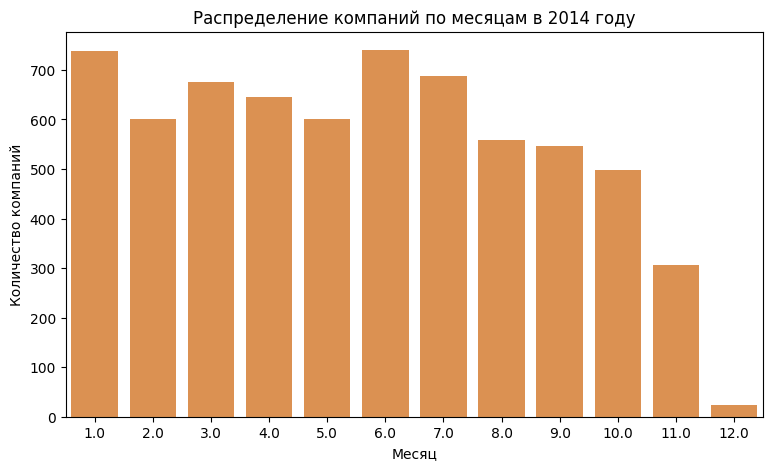

In [30]:
#Выделяем год и месяц из mid_funding_at
df_investments['funding_year'] = df_investments['mid_funding_at'].dt.year
df_investments['funding_month'] = df_investments['mid_funding_at'].dt.month

#Отбираем только 2014 год
df_2014 = df_investments[df_investments['funding_year'] == 2014]

#Считаем количество компаний по месяцам
funding_per_month_2014 = df_2014['funding_month'].value_counts().sort_index()

print("Количество компаний по месяцам в 2014 году:")
print(funding_per_month_2014)

#Визуализируем распределение с помощью столбчатой диаграммы
plt.figure(figsize=(9,5))
sns.barplot(x=funding_per_month_2014.index, y=funding_per_month_2014.values, color="#F28F3B")
plt.title("Распределение компаний по месяцам в 2014 году")
plt.xlabel("Месяц")
plt.ylabel("Количество компаний")
plt.show()

По результатам анализа распределения компаний по месяцам в 2014 году видно резкое снижение числа инвестиций в последние месяцы года, особенно в ноябре и декабре. Это может объясняться сезонным снижением активности (или неполными данными)

In [31]:
#Убираем компании с аномальным общим финансированием
df_clean = df_investments[~df_investments['is_outlier']].copy()
print(f"Количество компаний после исключения выбросов: {df_clean.shape[0]}")

#Фильтруем компании по годам с 50+ раундами финансирования
funding_rounds_per_year = df_clean.groupby('funding_year')['funding_rounds'].sum()
full_years = funding_rounds_per_year[funding_rounds_per_year >= 50].index.tolist()
df_clean = df_clean[df_clean['funding_year'].isin(full_years)].copy()
print(f"Количество компаний после фильтрации по полным годам: {df_clean.shape[0]}")


Количество компаний после исключения выбросов: 35705
Количество компаний после фильтрации по полным годам: 35629


Для дальнейшего анализа были исключены компании с аномальным финансированием.
Также была проведена фильтрация компаний, которые получали финансировавание в те годы, когда проводилось 50 и более раундов финансирования.
После фильтрации датафрейм содержит **29528 компании**.

### 3.3. Анализ типов финансирования по объёму и популярности

Построим график, который покажет, какие типы финансирования в сумме привлекли больше всего денег. (Значения в следующих столбцах: `seed`, `venture`, `equity_crowdfunding`, `undisclosed`, `convertible_note`, `debt_financing`, `angel`, `grant`, `private_equity`, `post_ipo_equity`, `post_ipo_debt`, `secondary_market` и `product_crowdfunding`).

С помощью графика визуализируем популярность разных типов финансирования — какие типы финансирования чаще всего используются компаниями.

Суммарные объёмы денежных средств по типам финансирования:
venture                 1.288276e+11
seed                    9.471516e+09
debt_financing          8.138443e+09
private_equity          4.677296e+09
angel                   2.467190e+09
undisclosed             2.119527e+09
post_ipo_equity         1.936460e+09
grant                   1.898560e+09
convertible_note        5.629718e+08
post_ipo_debt           2.868091e+08
equity_crowdfunding     2.379606e+08
product_crowdfunding    1.837939e+08
secondary_market        4.528580e+07
dtype: float64


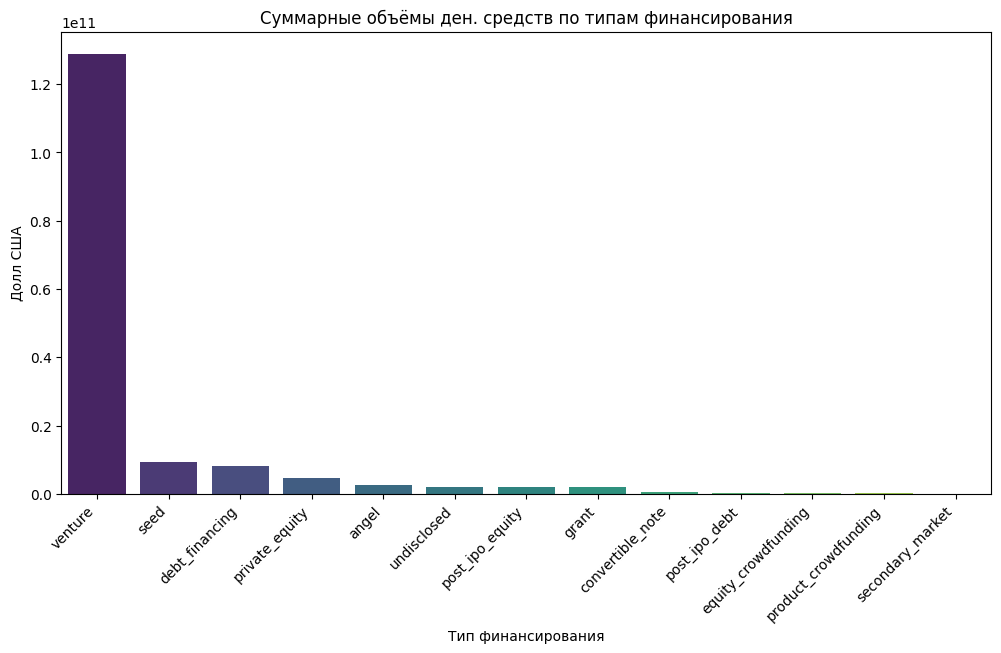


Популярность по типам финансирования:
venture                 18861
seed                    13391
debt_financing           3261
angel                    2943
grant                    1001
undisclosed               815
private_equity            631
convertible_note          520
equity_crowdfunding       515
product_crowdfunding      204
post_ipo_equity           165
post_ipo_debt              28
secondary_market            7
dtype: int64


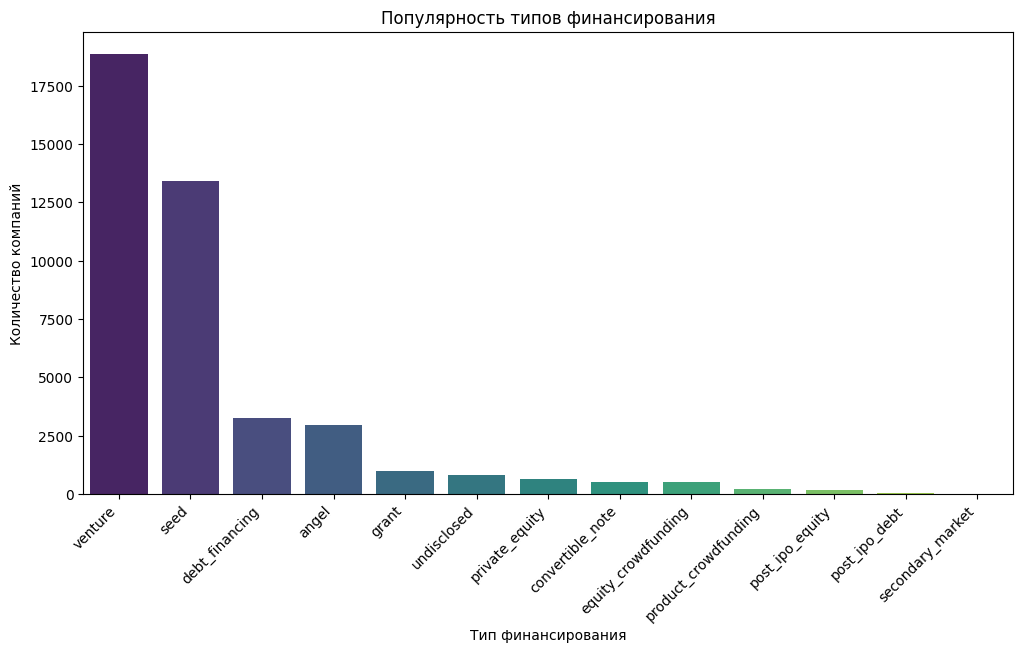

In [32]:
#Создаем список с типами финансирования которые необходимы для анализа
funding_types = [
    'seed', 'venture', 'equity_crowdfunding',
    'undisclosed', 'convertible_note',
    'debt_financing', 'angel', 'grant',
    'private_equity', 'post_ipo_equity',
    'post_ipo_debt','secondary_market', 
    'product_crowdfunding'
]

#Считаем суммарные объёмы ден средств по типам финансирования
total_funding = df_clean[funding_types].sum().sort_values(ascending=False)
print("Суммарные объёмы денежных средств по типам финансирования:")
print(total_funding)

#Визуализируем с помощью толбчатой диаграммы
plt.figure(figsize=(12,6))
sns.barplot(x=total_funding.index, y=total_funding.values, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.title("Суммарные объёмы ден. средств по типам финансирования")
plt.ylabel("Долл США")
plt.xlabel("Тип финансирования")
plt.show()

#Считаем популярность типов финансирования
popularity = (df_clean[funding_types] > 0).sum().sort_values(ascending=False)
print("\nПопулярность по типам финансирования:")
print(popularity)

#Визуализируем с помощью столбчатой диаграммы
plt.figure(figsize=(12,6))
sns.barplot(x=popularity.index, y=popularity.values, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.title("Популярность типов финансирования")
plt.ylabel("Количество компаний")
plt.xlabel("Тип финансирования")
plt.show()



Промежуточный вывод

Наибольшие суммарные инвестиции приходятся на venture, на втором месте — seed и debt_financing. Наименьшие суммарные объёмы наблюдаются у product_crowdfunding, equity_crowdfunding и secondary_market.

По популярности (количеству компаний, использующих тип финансирования) лидируют venture и seed, за ними следуют angel и debt_financing. Наименее популярные типы — secondary_market, post_ipo_debt и post_ipo_equity.

Тип финансирования venture сочетает высокую популярность и большой суммарный объём, что делает его ключевым инструментом инвестирования для широкого круга стартапов. Post-IPO и private equity встречаются редко, но дают крупные инвестиции на компанию, что указывает на поддержку зрелых или масштабных проектов. Seed и angel чаще используются на ранних стадиях, при этом средняя сумма на компанию относительно небольшая.

Минимальные суммы привлекают secondary_market и product_crowdfunding, что говорит о нишевом характере этих инструментов.

Построим график суммарных объёмов возвратов от разных типов финансирования за весь период на основе дополнительного датасета.

Суммарные возвраты по типам финансирования за весь период:
venture                 40578.62
debt_financing           4734.85
private_equity           3587.33
seed                     2382.24
angel                    1509.23
post_ipo_equity          1104.96
undisclosed               730.88
post_ipo_debt              91.03
convertible_note           34.79
secondary_market            5.20
equity_crowdfunding         3.83
product_crowdfunding        1.86
grant                       0.00
dtype: float64


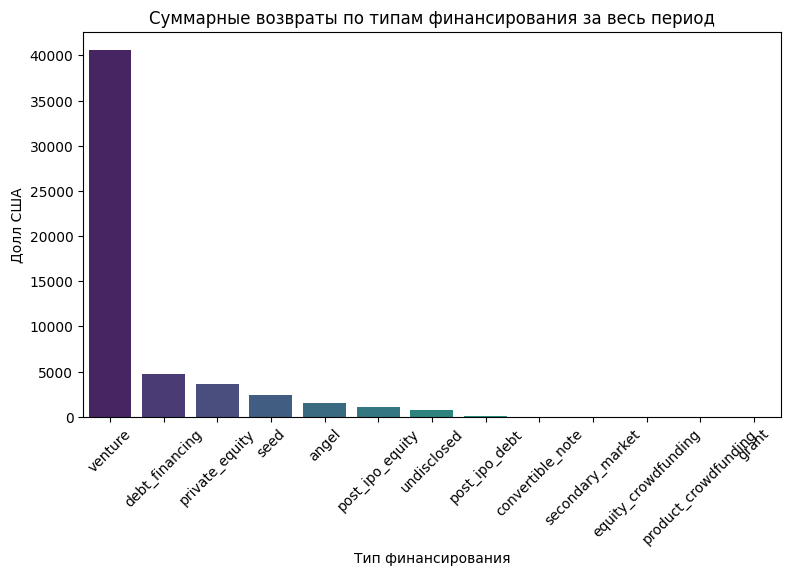

In [33]:
#Считаем суммарные возвраты  по типам финансирования за весь период
total_returns = df_returns[funding_types].sum().sort_values(ascending=False)
print("Суммарные возвраты по типам финансирования за весь период:")
print(total_returns)

#Визуализируем с помощью столбчатой диаграммы
plt.figure(figsize=(9,5))
sns.barplot(x=total_returns.index, y=total_returns.values, palette="viridis")
plt.title("Суммарные возвраты по типам финансирования за весь период")
plt.xlabel("Тип финансирования")
plt.ylabel("Долл США")
plt.xticks(rotation=45)
plt.show()


**Промежуточный вывод по возвратам**
Возвраты по типам финансирования повторяют общую картину: venture обеспечивает наибольшую часть возвратов, на втором и третьем месте — debt_financing и private_equity. Типы финансирования с высокой популярностью, такие как seed и angel, приносят умеренные возвраты, а редкие типы с крупными суммами (post_ipo_equity, private_equity) показывают среднюю доходность.

В целом, venture сочетает высокую популярность и крупный суммарный объём — ключевой инструмент инвестирования. Редкие типы с большими суммами ориентированы на зрелые проекты, а частые типы с небольшими суммами — на ранние стадии. Меньше всего средств привлекают secondary_market и product_crowdfunding.

## Шаг 4. Анализ динамики

### 4.1 Динамика предоставления финансирования по годам

Рассчитаем для каждой компании средний объём одного раунда финансирования, используя столбцы `funding_total_usd` и `funding_rounds`.

На основе получившейся таблицы построим графики, отражающие:
* динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования;

* динамику общего количества раундов за каждый год, то есть насколько активно происходили инвестиции на рынке (чем больше раундов, тем выше активность).

Сделаем выводы о том:
* В каком году типичный размер средств, собранных в рамках одного раунда, был максимальным?

* Какая тенденция наблюдалась в 2014 году по количеству раундов и средств, выделяемых в рамках каждого раунда?

In [34]:
#Создадим столбец с средним объёмом одного раунда
df_clean['avg_funding_per_round'] = df_clean['funding_total_usd'] / df_clean['funding_rounds']

#Сгруппируем данные по годам
yearly_stats = df_clean.groupby('funding_year').agg(
    avg_funding_per_round=('avg_funding_per_round', 'mean'),
    funding_rounds=('funding_rounds', 'sum')
).reset_index()

print(yearly_stats.head())

   funding_year  avg_funding_per_round  funding_rounds
0        2000.0           4.439803e+06           117.0
1        2001.0           3.366817e+06            66.0
2        2002.0           4.053461e+06            98.0
3        2003.0           3.403864e+06           129.0
4        2004.0           4.498155e+06           172.0


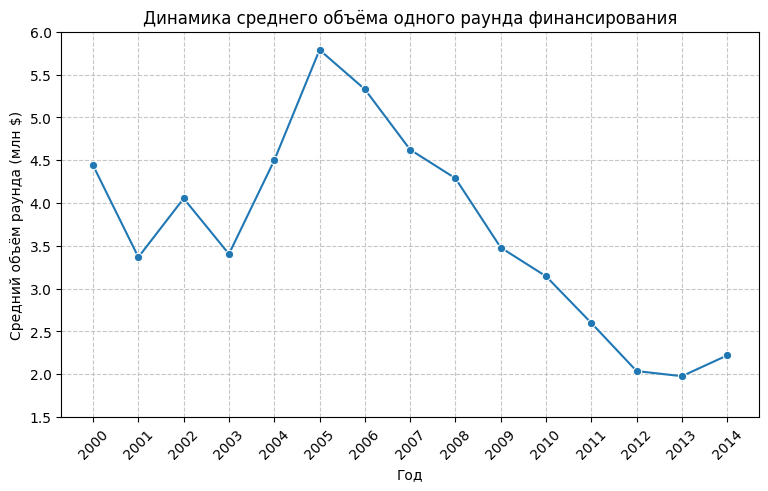

In [35]:
#Визуализируем динамику среднего объёма раунда инвестирования с помощью линейной диаграммы
plt.figure(figsize=(9,5))
sns.lineplot(
    data=yearly_stats, 
    x='funding_year', 
    y='avg_funding_per_round', 
    marker='o'
)
plt.title("Динамика среднего объёма одного раунда финансирования")
plt.xlabel("Год")
plt.ylabel("Средний объём раунда (млн $)")
plt.yticks(ticks=plt.yticks()[0], labels=[f"{x/1e6:.1f}" for x in plt.yticks()[0]])
plt.xticks(yearly_stats['funding_year'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

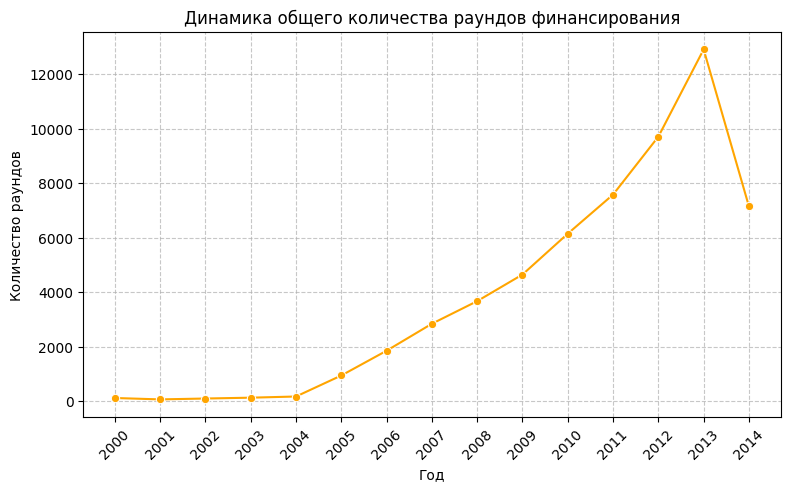

In [36]:
#Визуализируем динамику среднего объёма раунда инвестирования с помощью линейной диаграммы
plt.figure(figsize=(9,5))
sns.lineplot(
    data=yearly_stats, 
    x='funding_year', 
    y='funding_rounds', 
    marker='o', 
    color='orange'
)
plt.title("Динамика общего количества раундов финансирования")
plt.xlabel("Год")
plt.ylabel("Количество раундов")
plt.xticks(yearly_stats['funding_year'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**Промежуточные выводы**

- Средний объём финансирования на раунд (avg_funding_per_round):

В 2000–2005 годах средний размер одного раунда вырос до 5,8 млн долл. США. С 2006 года средний размер постепенно снижается, к 2013 году он составлял 2 млн долл. США. Средний объём каждой сделки стал меньше.

- Количество раундов (funding_rounds):

Число раундов финансирования стремительно росло до 2013 года и достигло 12 907. Что говорит об очень высокой активности инвесторов и расширение рынка стартапов, несмотря на то что средний размер раунда стал меньше.

### 4.2 Динамика размера общего финансирования по массовым сегментам рынка для растущих в 2014 году сегментов

С помощью сводной таблицы рассчитаем суммарный размер общего финансирования `funding_total_usd` по годам и сегментам рынка. 
Отберем сегменты, которые показывали рост размера суммарного финансирования в 2014 году по сравнению с 2013. Вихуализируем  как менялся суммарный размер общего финансирования в каждом из отобранных массовых сегментов по годам.

**Для решения данной задачи нам нужны данные за 2014 год поэтому возвращаемся к датасету с 2014 годом (но отфильтрованными выбросами)**

In [37]:
#Оставляем в датасете только сегменты, которые относятся к массовым
df_massive = df_clean[df_clean['market_segment'] == 'massive'].copy()

#Создаём сводную таблицу (суммарное финансирование по годам и сегментам рынка)
pivot_segment_funding = df_massive.pivot_table(
    index='funding_year',
    columns='market',  # исходный рынок/сегмент
    values='funding_total_usd',
    aggfunc='sum',
    fill_value=0
)

#Определяем сегменты рынка, которые выросли в 2014 году по сравнению с 2013
segments_growing_2014 = []
if 2013 in pivot_segment_funding.index and 2014 in pivot_segment_funding.index:
    for segment in pivot_segment_funding.columns:
        if pivot_segment_funding.loc[2014, segment] > pivot_segment_funding.loc[2013, segment]:
            segments_growing_2014.append(segment)

#Фильтруем для анализа только растущие сегменты
pivot_growth = pivot_segment_funding[segments_growing_2014]

print("Сегменты с ростом финансирования в 2014 году:", segments_growing_2014)
display(pivot_growth)

Сегменты с ростом финансирования в 2014 году: [' Apps ', ' Cloud Computing ', ' Entertainment ', ' Internet ', ' Medical ', ' Networking ', ' Photography ', ' Real Estate ', ' Startups ', ' Technology ', ' Video ', 'E-Commerce ', 'Unknown']


market,Apps,Cloud Computing,Entertainment,Internet,Medical,Networking,Photography,Real Estate,Startups,Technology,Video,E-Commerce,Unknown
funding_year,,,,,,,,,,,,,
2000.0,0.0,11500000.0,100000.0,10000000.0,24000000.0,0.0,0.0,2500000.0,0.0,0.0,0.0,0.0,1839560.0
2001.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22160000.0,0.0,0.0,10160345.0
2002.0,0.0,0.0,0.0,1100000.0,0.0,0.0,0.0,5275000.0,0.0,2500000.0,0.0,0.0,242132.0
2003.0,0.0,0.0,0.0,0.0,0.0,0.0,7100000.0,6292200.0,0.0,0.0,5000000.0,0.0,4155202.0
2004.0,0.0,0.0,0.0,10500000.0,0.0,0.0,0.0,0.0,0.0,1750000.0,14704000.0,0.0,10847977.0
2005.0,0.0,0.0,10000000.0,1775000.0,11090000.0,0.0,7000000.0,250000.0,0.0,50728425.0,5000000.0,0.0,28384331.0
2006.0,1310600.0,9666354.0,1800000.0,5000.0,20250000.0,26889850.0,17936406.0,2080000.0,0.0,22791000.0,55321772.0,1120000.0,46049840.0
2007.0,0.0,20354343.0,31224025.0,4455379.0,2100000.0,43745721.0,21315000.0,19710000.0,0.0,180190209.0,71380644.0,0.0,35532468.0
2008.0,4300000.0,44375000.0,11150000.0,21412964.0,28812744.0,30807000.0,28949322.0,46613100.0,5010387.0,338226238.0,37865177.0,5558510.0,45345010.0


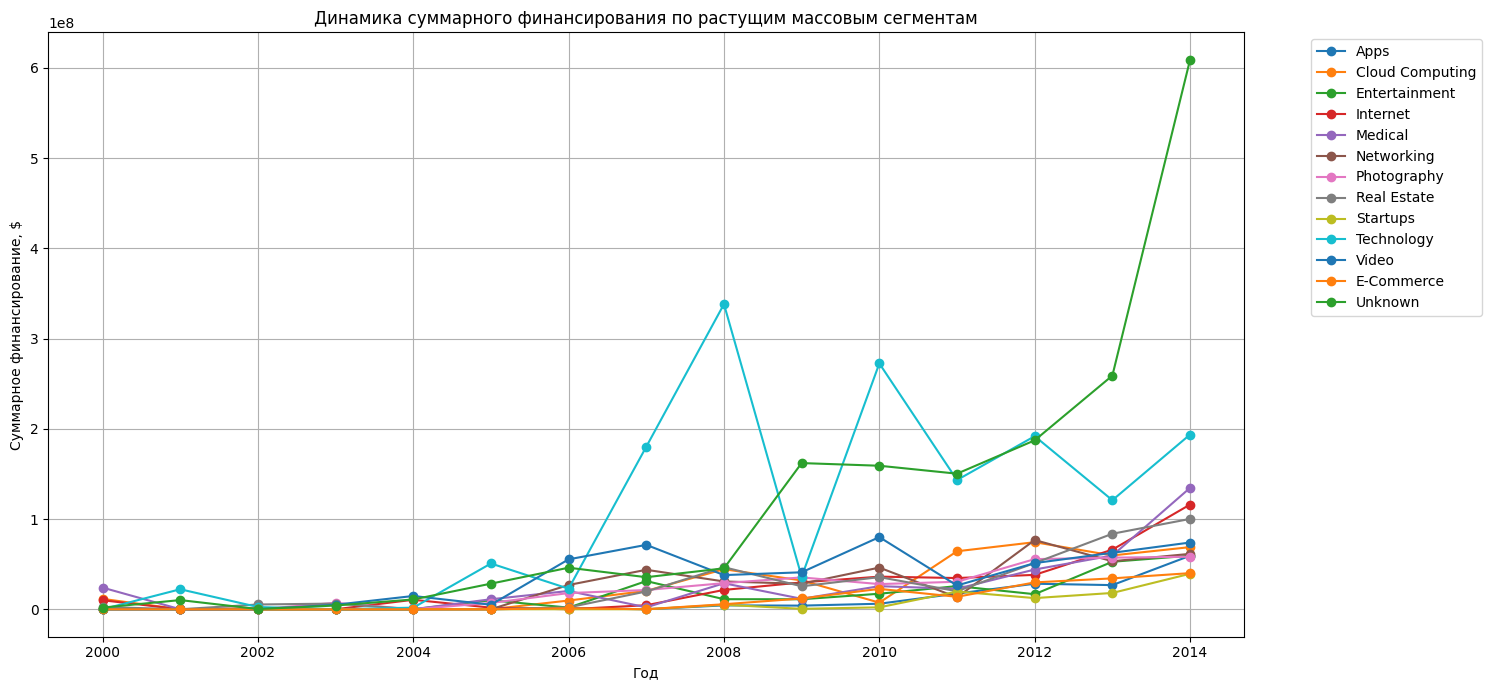

In [38]:
#Визуализируем динамику суммарного финансирования по растущим массовым сегментам
plt.figure(figsize=(15,7))

for segment in pivot_growth.columns:
    plt.plot(
        pivot_growth.index, 
        pivot_growth[segment], 
        marker='o', 
        label=segment.strip()
    )

plt.title("Динамика суммарного финансирования по растущим массовым сегментам")
plt.xlabel("Год")
plt.ylabel("Суммарное финансирование, $")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


**Промежуточные выводы по графику**
Больше всего растет финансирование по компаниям: которые не указали свой сегмент (unknown). Сы видим рост по всем массовым сегментам: наибольший рост отмечается в сегменте Technology.

В целом, наибольший и устойчивый рост характерен для технологических направлений — именно они оставались ключевыми точками притяжения инвестиций в 2014 году.

### 4.3 Годовая динамика доли возвращённых средств по типам финансирования

Проанализируем, какая часть вложенных или выданных денег со временем возвращается обратно инвесторам или финансистам. 

Для каждого года и каждого вида финансирования рассчитаем нормированные значения возврата средств (норму доходности).


In [39]:
#Считаем суммарное финансирование сгруппированное по годам
funding_by_year = df_investments.groupby('funding_year')[funding_types].sum()

#Считаем суммарные возвраты по годам (year в этом датасете индекс)
returns_by_year = df_returns[funding_types].copy()

#Ввчисляем долю доходности с вложенных инвестиций (для удобства и чтобы не делить на ноль в знаменатель добавляем 1e-60)
returns_ratio = returns_by_year / (funding_by_year + 1e-60)

#Заменим аномальные значения
for col in returns_ratio.columns:
    returns_ratio.loc[(returns_ratio[col] < 0) | (returns_ratio[col] > 1), col] = np.nan

Визуализирукм нормированную доходность для следующих типов финансирования `venture`, `debt_financing`, `private_equity`, `seed` и `angel`.

Проанализируем, в каких типах финансирования наблюдается наиболее устойчивый рост показателя.

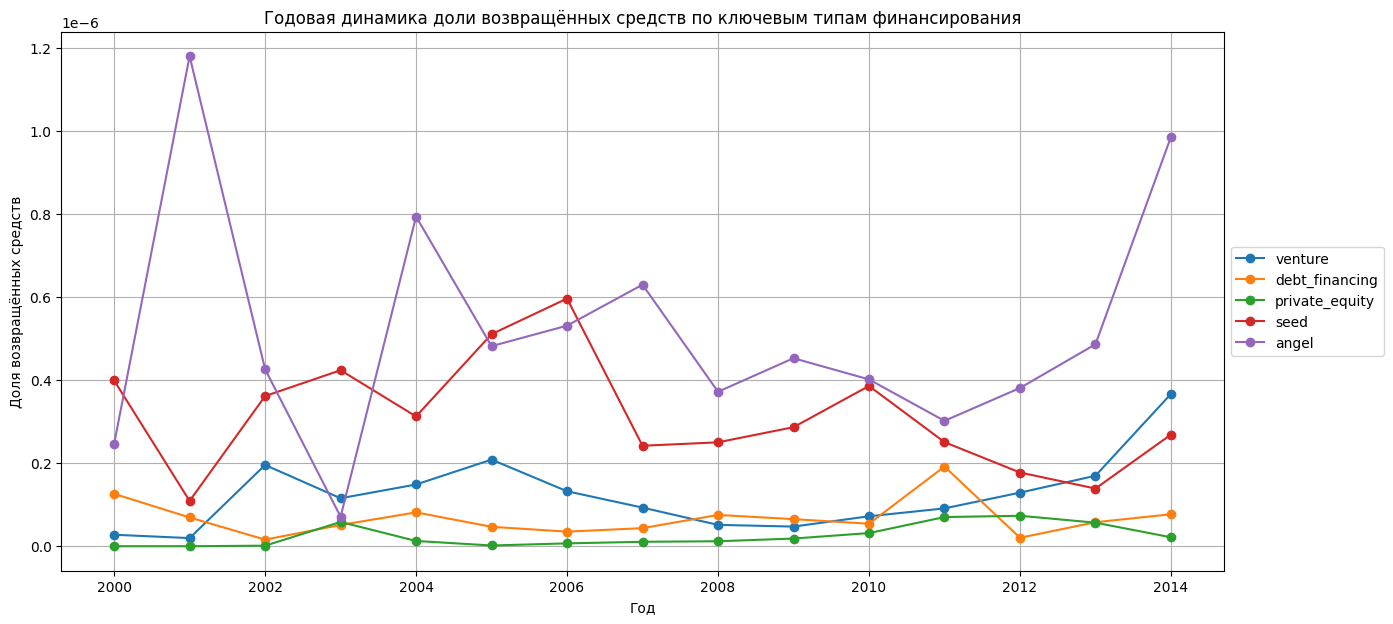

In [40]:
#Выбираем нужные типы финансирования для графика
focus_types = ['venture', 'debt_financing', 'private_equity', 'seed', 'angel']

#Визуализируем с помощью линейного графика
plt.figure(figsize=(15,7))
for ftype in focus_types:
    if ftype in returns_ratio.columns:
        plt.plot(returns_ratio.index, returns_ratio[ftype], marker='o', label=ftype)

plt.title("Годовая динамика доли возвращённых средств по ключевым типам финансирования")
plt.xlabel("Год")
plt.ylabel("Доля возвращённых средств")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()


**Промежуточный вывод**

- Наиболее устойчивый рост нормированного возврата вложенных средств наблюдается у **venture**. Для **venture** доля возвратов постепенно увеличивается с 7,2e-08 в 2010 до 3,67e-07 в 2014.
- У **angel** самый высокий уровень нормированного возврата ден. средств, однако большие колебания с значительными паддениями до 2010 года и потом уже наблюдается более плавный рост с 4,02e-07 до 9,86e-07.
- **Debt_financing** резко вырос в 2011 (1,92e-07), потом снизился и лишь слегка поднялся к 2014.
- Нормированный возврат по типу финансирования **Seed** сначала растет сколебаниями до 2006 потом резко снижается и видим более плавный рост.
- **Private_equity** показывает стабильно низкий уровень возвратов, без заметного роста.
Можно сделать выводы по доходности от инвестиций, что самые надёжные с точки зрения возвратов - **venture и angel**.


## Шаг 5. Итоговый вывод и рекомендации

В рамках учебного проекта даем рекомендации заказчику на 2015 год


1.  **Рекомендация по инвестициям**

**1)	Наиболее перспективные для инвестиций сегменты — технологические направления, включая*
o	Technology
o	Cloud Computing
o	E-Commerce
o	Internet
>Эти сегменты показывают устойчивый рост суммарного финансирования в 2014 году, высокую активность раундов и привлекают значительные средства, что делает их ключевыми точками притяжения инвестиций.

**2) Тип финансирования:**
- Venture представляет самый популярный и крупный по суммарным объёмам тип инвестирования. Более того он обеспечивает стабильно высокую норму возврата вложенных средств  и подходит для стартапов на ранней и стадии роста.
- Angel также можно рассматривать как тип инвестирования в небольшие проекты с потенциалом роста; так как он показывает устойчивый рост нормы возвратов.
- Seed  подходит для небольших стартапов, но возврат менее предсказуемый.
- Private Equity и post-IPO представляют собой редкие и крупные суммы, ориентированы на зрелые компании, доходность низкая, но стабильная.
 

**Выполненные шаги:**
1.	Проведена предобработка данных, заполнены пропуски, изменены типы данных на подходящие. 
> После первичного анализа выявлено большое количество пропусков в cb_investments: до 44 % в столбцах state_code, participants, 29 % в данных о дате основания и до 24 % в суммах финансирования. В текстовых столбцах (category_list, market, country_code, region, city) пропуски были заменены на метку "Unknown", в числовых столбцах participants — на индикатор -1. Строки, не содержащие никакой информации о финансировании, были удалены (~9 %), что позволило сохранить только релевантные данные для анализа.
Типы данных были приведены в соответствие с содержимым: даты переведены в datetime, числовые столбцы очищены от запятых и переведены в float, категории нормализованы (разделение списков через |, приведение к нижнему регистру).
После предобработки осталось 40 907 строк (удалено 24,7 % исходного датасета). Все финансовые показатели и категориальные признаки заполнены, пропуски остались лишь в столбцах с датами основания компаний, что не мешает дальнейшему анализу. Датасет cb_returns полон, пропусков не содержит.
2.	Проведен инжиниринг признаков
> 	Компании были разделены по срокам финансирования и сегментам рынка (massive, mid, niche). Анализ распределения компаний и инвестиций по группам показал, что Большинство компаний сосредоточено в массовых сегмента.
3.	Был проведен анализ аномальных значений (выбросов)
>  Были выявлены аномальные объёмы финансирования по каждому сегменту методом IQR. Выбросы  были исключены и отобрали данные за годы с 50 раундами финансирования и более. Сегменты с наибольшей долей выбросов: Technology, Software, Cloud Computing, Big Data, Real Estate (~16–18 % выбросов)
4.	Был проведен анализ типов финансирования
> Рассмотрели популярность разных типов финансирования по кол-ву компаний и суммарным объёмам. Анализ показал, что наибольшие возвраты приносят venture, debt_financing, private_equity
5.	Был проведен анализ динамики инвестирования за все время существования фонда
> Рассчитали средний объём одного раунда и активность рынка по годам. Проанализировали суммарное финансирование по массовым сегментам, выявили сегменты с ростом в 2014 году. Рассмотрели годовую динамику доли возвратов по типам финансирования. Вывод рынок стартапов расширялся, при том что средний объем инвестиций в одной сделке уменьшался
6.	Был проведен анализ годовой динамики доли возвращённых средств по типам финансирования
> Самыми надёжными типами финансирования с точки зрения нормы доходности вложенных средств стали venture и angel. Private equity обеспечивает крупные инвестиции, но менее предсказуемую норму доходности

**Основные выводы**

***Сроки финансирования:***

- Большинство компаний (59 %) получают один раунд финансирования; только 30 % компаний получают инвестиции с длительным циклом >1 года.
- Доля короткосрочных проектов (≤1 год) 11 %.

***Сегменты рынка:***
- 81 % компаний концентрируются в массовых сегментах экономики, средние — 12 %, нишевые — 6 %.
- Отмечается наибольший рост финансирования в 2014 году в сегменте Technology.

***Выбросы и распределение инвестиций:***

- Типичный размер финансирования на компанию: 0,2–10 млн USD.
- Есть очень крупыне сделки до  30 млрд долл США, которые были исключены из датасета для проведения дальнейшего анализа.

***Типы финансирования***
- Venture является самым популярным и крупным инвестиционным инструмент, здесь сконцентрированы основные потоки капитала на рынке инвестиций в стартапы.
- Seed и Angel используются для ранних стадий стартапов; суммы и доходность умеренные, обычно эти типы как раз помогают запускать новые проекты.
- Private Equity и post-IPO используются редно, но это крупные сделки; дают стабильные результаты, однако норма жоходности невысока.
- Secondary и product crowdfunding — нишевые варианты, небольшие по объёму, подходят для ограниченных или экспериментальных проектов.

***Динамика рынка:***

- Средний размер одного инвестиционного раунда был на пике в 2005–2006 годах, после чего постепенно снижался.
- При этом число раундов стабильно росло до 2013 года, что отражает рост активности инвесторов и расширение рынка стартапов.
- В 2014 году рынок продолжал развиваться: как по количеству сделок, так и по суммарному финансированию, особенно в технологических сегментах.
- Норма доходности (возврата) от вложенных средств:
- Наиболее надёжными типами инвестирования являются venture и angel, с устойчивым ростом доходности. 


***Согласованность и сомнения***
- Согласованность: все выводы по сегментам, типам финансирования и динамике рынка подтверждают, что технологические направления и venture/angel финансирование наиболее перспективные направдения для инвесторов в 2015 году.
- Возможные сомнения: 
1) в ходе анализа мы отметили, что сегменты рынка, которые не указаны и попадают в категориб Unknown показывает сильный рост, что может указывать на неполные или некорректно классифицированные данныеи требует дальнейшего исследования.
2) резкое снижение активности инвестиций в конце 2014 года может быть связано с сезонностью или неполными данными, что требует более детаьного изучения рынка инвестиционных инструментов